# Message Passing

## Setup

In [1]:
%matplotlib inline
import numpy as np
from tramp.algos import DisplayLatexMessagePassing
from IPython.display import display_latex
from tramp.models import Perceptron, Committee, TVClassification
from tramp.experiments import TeacherStudentScenario
import logging
logger = logging.getLogger()

## Perceptron

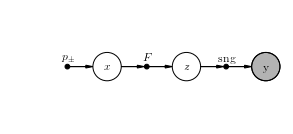

In [2]:
perceptron = Perceptron(N=100, alpha=0.5, ensemble_type="gaussian", p_pos=0.5)
scenario = TeacherStudentScenario(perceptron)
scenario.setup()
scenario.student.daft()

In [3]:
latex = DisplayLatexMessagePassing(scenario.student).run()
print("FORWARD")
for msg in latex["forward"]:
    display_latex(msg, raw=True)
print("BACKWARD")
for msg in latex["backward"]:
    display_latex(msg, raw=True)

FORWARD


BACKWARD


## Committee

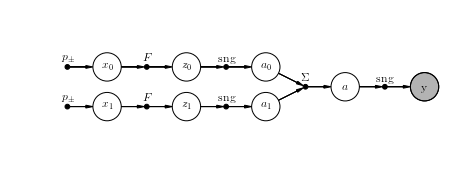

In [4]:
committee = Committee(
    K=2, N=100, alpha=0.5, ensemble_type="gaussian", 
    prior_type="binary", p_pos=0.5, activation1="sng", activation2="sng"
)
scenario = TeacherStudentScenario(committee, x_ids=["x_0","x_1"])
scenario.setup()
scenario.student.daft()

In [5]:
latex = DisplayLatexMessagePassing(committee).run()
print("FORWARD")
for msg in latex["forward"]:
    display_latex(msg, raw=True)
print("BACKWARD")
for msg in latex["backward"]:
    display_latex(msg, raw=True)

FORWARD


BACKWARD


## TV classification

In [6]:
# fake data
A = np.ones((3, 4*5))
y = np.ones(3)
x_shape = (4, 5)

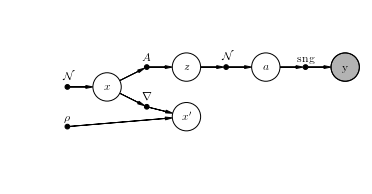

In [7]:
from tramp.models import SparseGradientClassification
sparse_grad = SparseGradientClassification(
    A=A, x_shape=x_shape, y=y, rho_grad=0.3, var_noise=0.1, var_prior=1
)
sparse_grad.daft()

In [8]:
latex = DisplayLatexMessagePassing(sparse_grad).run()
print("FORWARD")
for msg in latex["forward"]:
    display_latex(msg, raw=True)
print("BACKWARD")
for msg in latex["backward"]:
    display_latex(msg, raw=True)

FORWARD


BACKWARD
